In [1]:
using LinearAlgebra
using Plots


In [2]:
using Pkg
Pkg.add("Plots")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [15]:
function draw_NACA_4_digit(naca_id::String)
    m = parse(Int64, naca_id[1]) / 100
    p = parse(Int64, naca_id[2]) / 10
    upper_lower = parse(Int64, naca_id[3:4]) / 100

    camber_x, camber_y = NACA_4_digit_camber(m, p)
    upper, lower = NACA_4_digit_upper_lower(m, p, upper_lower, camber_y)

    plt = plot(camber_x, camber_y, ylim=[-0.2, 0.2], size=(700, 300), label="Camber", linewidth=2)
    plot!(upper[1], upper[2], label="Upper Surface", linewidth=2)
    plot!(lower[1], lower[2], label="Lower Surface", linewidth=2)

    plt
end

draw_NACA_4_digit (generic function with 1 method)

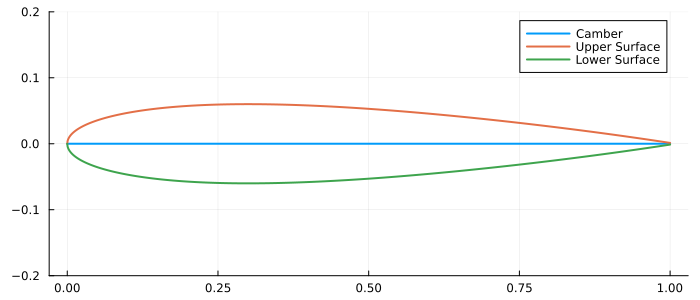

In [51]:
draw_NACA_4_digit("0012")

In [45]:
function NACA_4_digit_camber(m::Union{Float64, Int64}, p::Union{Float64, Int64})
    if p != 0
        x_1 = LinRange(0, p, floor(Int64, 2000 * p))
        x_2 = LinRange(p, 1., floor(Int64, 2000 * (1 - p)))
        a = m / p^2 .* (2 * p .* x_1 - x_1.^2)
        b = m / (1 - p)^2 .* ((1 - 2 * p) .+ 2 * p .* x_2 - x_2.^2)
        return [x_1; x_2], [a; b]
    else
        return LinRange(0, 1, 2000), [0. for i in 1:2000]
    end
end

NACA_4_digit_camber (generic function with 1 method)

In [46]:
function NACA_4_digit_upper_lower(m::Union{Float64, Int64}, p::Union{Float64, Int64}, upper_lower::Union{Float64, Int64}, y_c::Vector{Float64})
    x = LinRange(0, 1, 2000)
    y_t = 5 .* upper_lower .* (0.2969 .* sqrt.(x) .- 0.1260 .* x .- 0.3516 .* x.^2 .+ 0.2843 .* x.^3 .- 0.1015 .* x.^4)
    if p != 0
        x_1 = LinRange(0, p, floor(Int64, 2000 * p))
        x_2 = LinRange(p, 1., floor(Int64, 2000 * (1 - p)))
        a = 2 .* m / p^2 .* (p .- x_1)
        b = 2 .* m / (1 - p)^2 .* (p .- x_2)
        θ = atan.([a; b])

        x_u = x .- y_t .* sin.(θ)
        x_l = x .+ y_t .* sin.(θ)
        y_u = y_c .+ y_t .* cos.(θ)
        y_l = y_c .- y_t .* cos.(θ)
    else
        x_u = x
        x_l = x
        y_u = y_t
        y_l = .-y_t
    end

    (x_u, y_u), (x_l, y_l)
end

NACA_4_digit_upper_lower (generic function with 1 method)

In [48]:
x, y = NACA_4_digit_camber(0.02, 0.4)

([0.0, 0.0005006257822277848, 0.0010012515644555696, 0.0015018773466833543, 0.0020025031289111392, 0.0025031289111389237, 0.0030037546933667086, 0.003504380475594493, 0.0040050062578222785, 0.004505632040050062  …  0.9954962468723937, 0.9959966638865722, 0.9964970809007506, 0.9969974979149291, 0.9974979149291076, 0.997998331943286, 0.9984987489574645, 0.9989991659716431, 0.9994995829858215, 1.0], [0.0, 5.003124995104957e-5, 9.999984335864135e-5, 0.00014990578022277534, 0.00019974906054345153, 0.0002495296843206699, 0.0002992476515544305, 0.00034890296224473333, 0.0003984956163915783, 0.0004480256139949655  …  0.0002991233311607284, 0.0002659987020042406, 0.00023284624871574197, 0.0001996659712952388, 0.00016645786974272487, 0.00013322194405820018, 9.995819424165856e-5, 6.666662029311235e-5, 3.3347222212561554e-5, 0.0])

In [49]:
upper, lower = NACA_4_digit_upper_lower(0.02, 0.4, 0.12, y)

(([0.0, 0.0001080496901755732, 0.0004487457388146702, 0.0008279167692171371, 0.0012270815276615248, 0.0016390717678561174, 0.0020602064130351132, 0.0024882959473713747, 0.002921911975631663, 0.0033600610808618677  …  0.9956225272849238, 0.9961182681629334, 0.9966139984746127, 0.9971097182099169, 0.9976054273587844, 0.9981011259111374, 0.9985968138568811, 0.9990924911859042, 0.9995881578880788, 1.00008381395326], [0.0, 0.003976950391237761, 0.005631390740937105, 0.006903599890403618, 0.007977878105804982, 0.00892561163781909, 0.009783411277465142, 0.010573025279479696, 0.011308623693129901, 0.012000048977489018  …  0.0021849550224223176, 0.0020821539533512107, 0.0019792825412134497, 0.0018763407414991108, 0.0017733285095978904, 0.001670245800799142, 0.0015670925702916281, 0.0014638687731638959, 0.0013605743644038587, 0.001257209298899305]), ([0.0, 0.0008924505599494893, 0.0015522547614354547, 0.0021735839811580504, 0.002774919472838725, 0.003363429482769195, 0.003942795087715262, 0.0045